# 0 Imports

In [4]:
import pickle

import pandas   as pd
import seaborn  as sns
from matplotlib import pyplot as plt

import funcoes_suporte as fs

## 0.1 Help Functions

In [5]:
fs.jupyter_settings(altura= 18, largura= 14, fonte= 11)
fs.supressao_notacao()

# 1.0 Descrição de dados

In [6]:
x_treino = pickle.load(open('../data/interim/x_treino.pkl', 'rb'))
y_treino = pickle.load(open("../data/interim/y_treino.pkl","rb"))
df = x_treino
df['resposta'] = y_treino.values
df.head()

,id,genero,idade,codigo_regiao,contato_cliente,cnh,idade_veiculo,veiculo_danificado,seguro_previo_automovel,premio_anual,cliente_dias_contrato,resposta
55914,55915,Male,33,29.000,124.000,1,1-2 Year,Yes,0,26761.000,139,0
179876,179877,Male,55,28.000,26.000,1,> 2 Years,Yes,0,27875.000,285,1
300095,300096,Female,26,28.000,152.000,1,< 1 Year,No,1,43562.000,118,0
60078,60079,Male,57,38.000,124.000,1,1-2 Year,No,1,51365.000,249,0
312426,312427,Male,27,42.000,152.000,1,< 1 Year,Yes,0,26590.000,161,0


## 1.2 Tipos de dados

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266776 entries, 55914 to 121958
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       266776 non-null  int64  
 1   genero                   266776 non-null  object 
 2   idade                    266776 non-null  int64  
 3   codigo_regiao            266776 non-null  float64
 4   contato_cliente          266776 non-null  float64
 5   cnh                      266776 non-null  int64  
 6   idade_veiculo            266776 non-null  object 
 7   veiculo_danificado       266776 non-null  object 
 8   seguro_previo_automovel  266776 non-null  int64  
 9   premio_anual             266776 non-null  float64
 10  cliente_dias_contrato    266776 non-null  int64  
 11  resposta                 266776 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 26.5+ MB


## 1.5 Estatística Descritiva

In [8]:
var_num = df.select_dtypes( include = ['int64','float64'])
var_cat = df.select_dtypes( exclude = ['int64','float64'])

### 1.5.1 Variáveis Numéricas

In [9]:
estatistica =  fs.estatistica_descritiva(var_num)
estatistica

,variaveis,minimo,maximo,range,media,mediana,desvio_padrao,iqr,assimetria,curtosis,cv
0,id,2.000,381108.000,381106.000,190548.259,190543.500,110059.964,190549.500,0.001,-1.200,0.578
1,idade,20.000,85.000,65.000,38.852,36.000,15.515,24.000,0.668,-0.573,0.399
2,codigo_regiao,0.000,52.000,52.000,26.414,28.000,13.215,20.000,-0.118,-0.863,0.500
3,contato_cliente,1.000,163.000,162.000,111.938,128.000,54.243,126.000,-0.896,-0.978,0.485
4,cnh,0.000,1.000,1.000,0.998,1.000,0.046,0.000,-21.414,456.561,0.047
5,seguro_previo_automovel,0.000,1.000,1.000,0.458,0.000,0.498,1.000,0.167,-1.972,1.087
6,premio_anual,2630.000,540165.000,537535.000,30580.218,31680.000,17260.707,15005.250,1.863,36.726,0.564
7,cliente_dias_contrato,10.000,299.000,289.000,154.277,154.000,83.670,145.000,0.005,-1.200,0.542
8,resposta,0.000,1.000,1.000,0.122,0.000,0.327,0.000,2.309,3.330,2.681


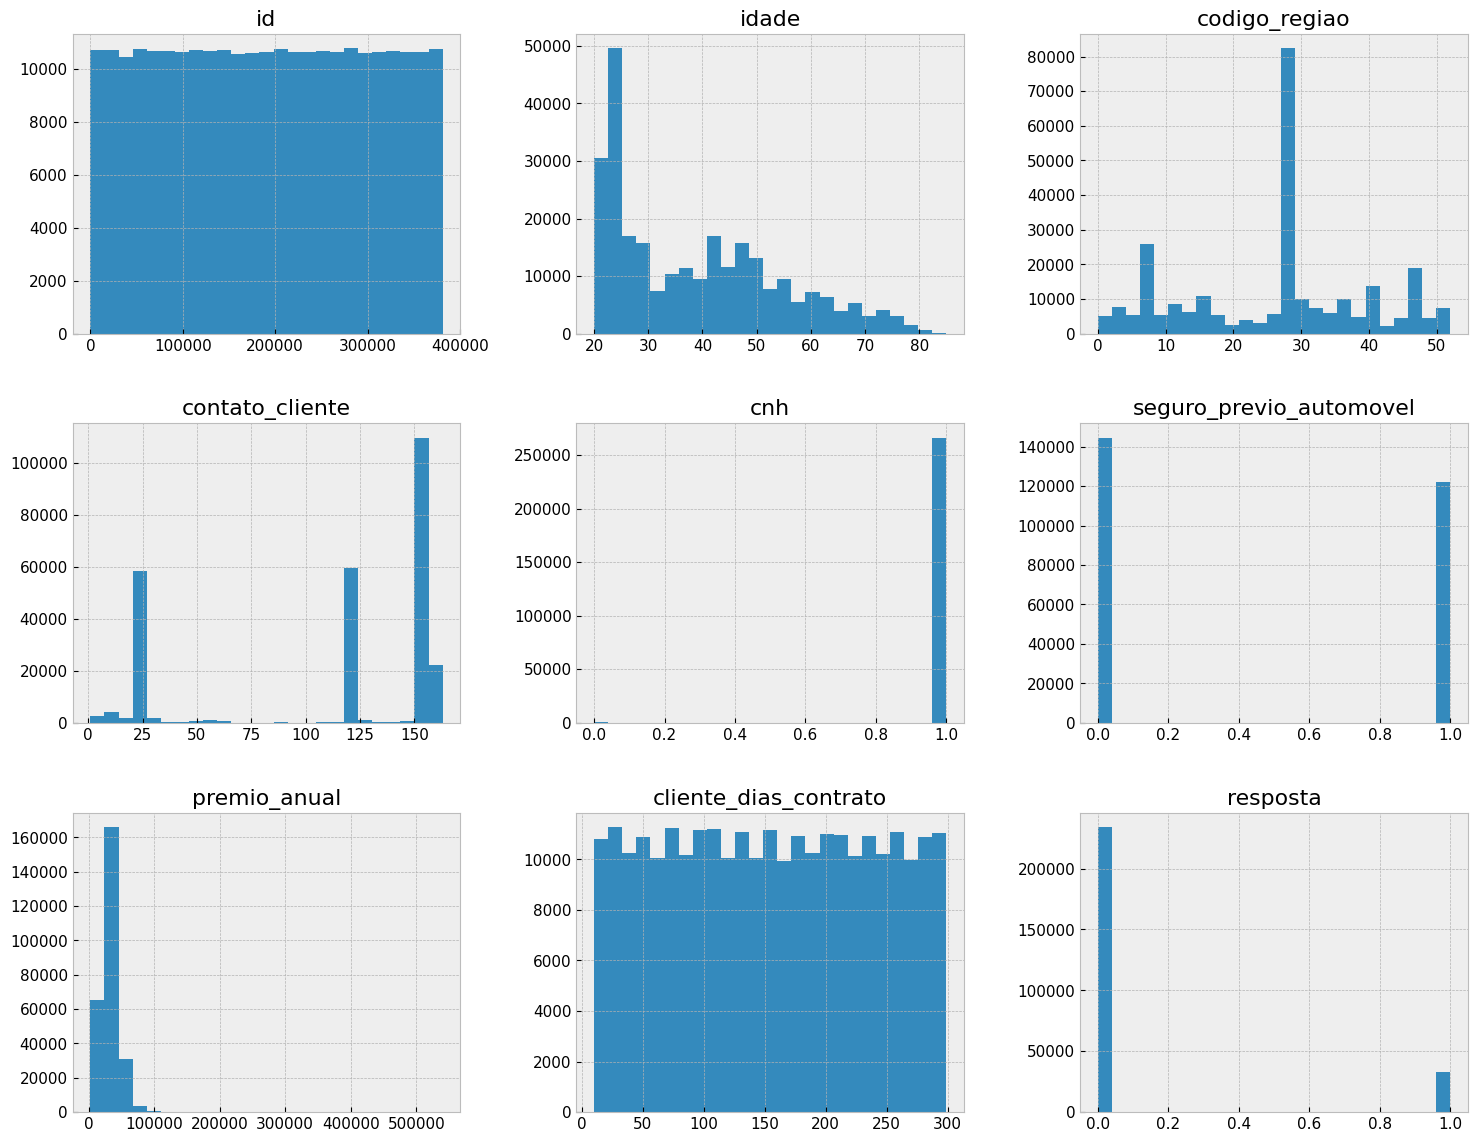

In [10]:
var_num.hist(bins = 25);

### 1.5.2 Vairáveis Categóricas

In [11]:
var_cat.describe().T

,count,unique,top,freq
genero,266776,2,Male,144193
idade_veiculo,266776,3,1-2 Year,140360
veiculo_danificado,266776,2,Yes,134802


<Axes: xlabel='veiculo_danificado', ylabel='resposta'>

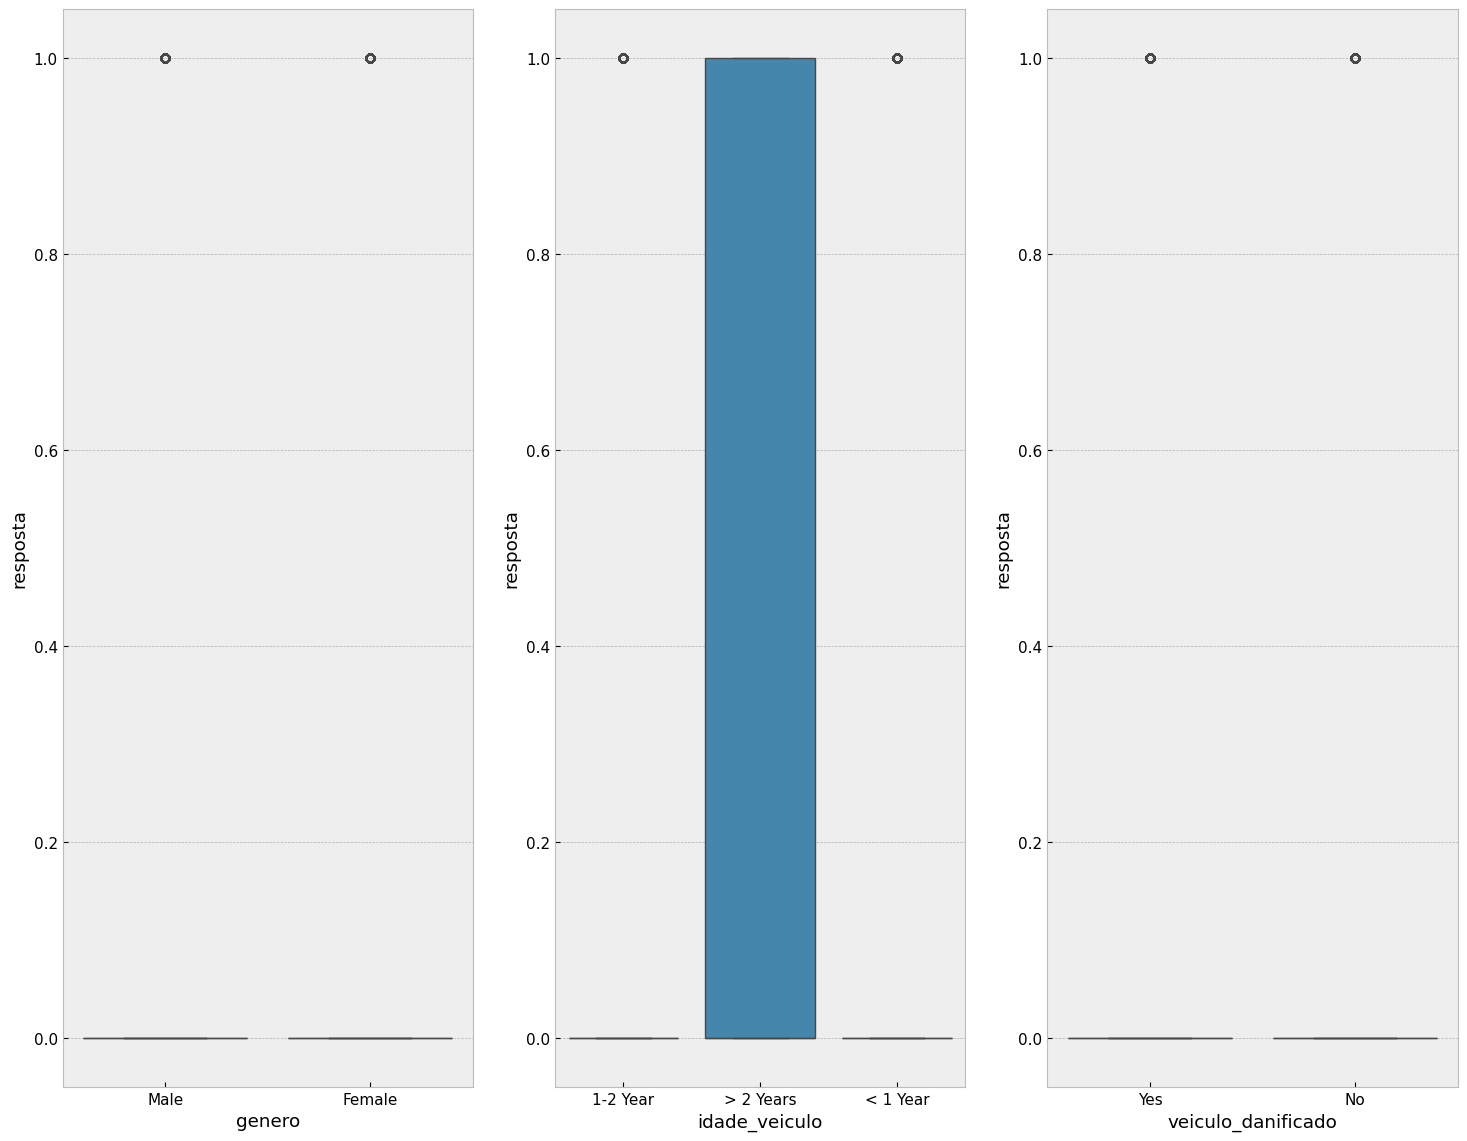

In [12]:
plt.subplot(1, 3, 1)
sns.boxplot( data=df , x='genero' , y='resposta')

plt.subplot(1, 3, 2)
sns.boxplot( data=df , x='idade_veiculo' , y='resposta')

plt.subplot(1, 3, 3)
sns.boxplot( data=df , x='veiculo_danificado' , y='resposta')

<Axes: >

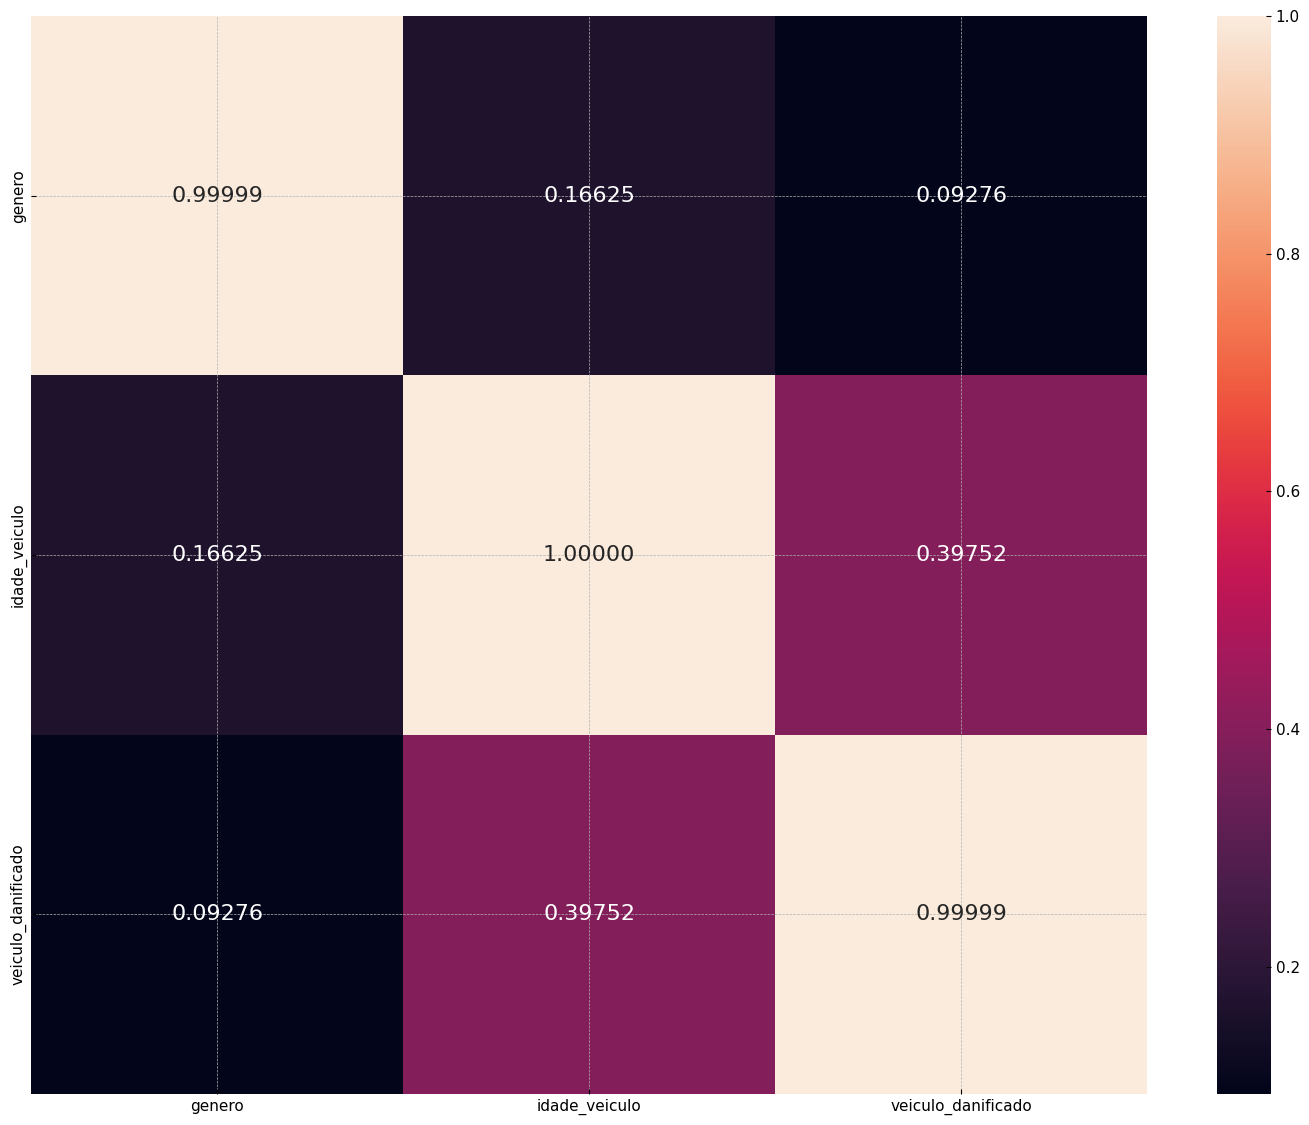

In [13]:
a1 = fs.cramer_v(var_cat['genero'],var_cat['genero'])
a2 = fs.cramer_v(var_cat['genero'],var_cat['idade_veiculo'])
a3 = fs.cramer_v(var_cat['genero'],var_cat['veiculo_danificado'])

a4 = fs.cramer_v(var_cat['idade_veiculo'],var_cat['genero'])
a5 = fs.cramer_v(var_cat['idade_veiculo'],var_cat['idade_veiculo'])
a6 = fs.cramer_v(var_cat['idade_veiculo'],var_cat['veiculo_danificado'])

a7 = fs.cramer_v(var_cat['veiculo_danificado'],var_cat['genero'])
a8 = fs.cramer_v(var_cat['veiculo_danificado'],var_cat['idade_veiculo'])
a9 = fs.cramer_v(var_cat['veiculo_danificado'],var_cat['veiculo_danificado'])

d = pd.DataFrame( {'genero': [a1, a2, a3],
               'idade_veiculo': [a4, a5, a6],
               'veiculo_danificado': [a7, a8, a9]   })

d = d.set_index( d.columns )

sns.heatmap(d, annot=True, annot_kws={"size": 16}, fmt = '.5f')

## 1.6 Checagem dos Atributos

Atributo: genero
Total de Valores Únicos: 2
Total de Valores não Nulos: 266776
Total de Valores Nulos: 0
Porcentagem Valores Nulos (%) : 0.00%

Valores Descritos: ['Female', 'Male']

Contagem de Female: 122583; Porcentagem em relação ao total:45.95%
Contagem de Male: 144193; Porcentagem em relação ao total:54.05%


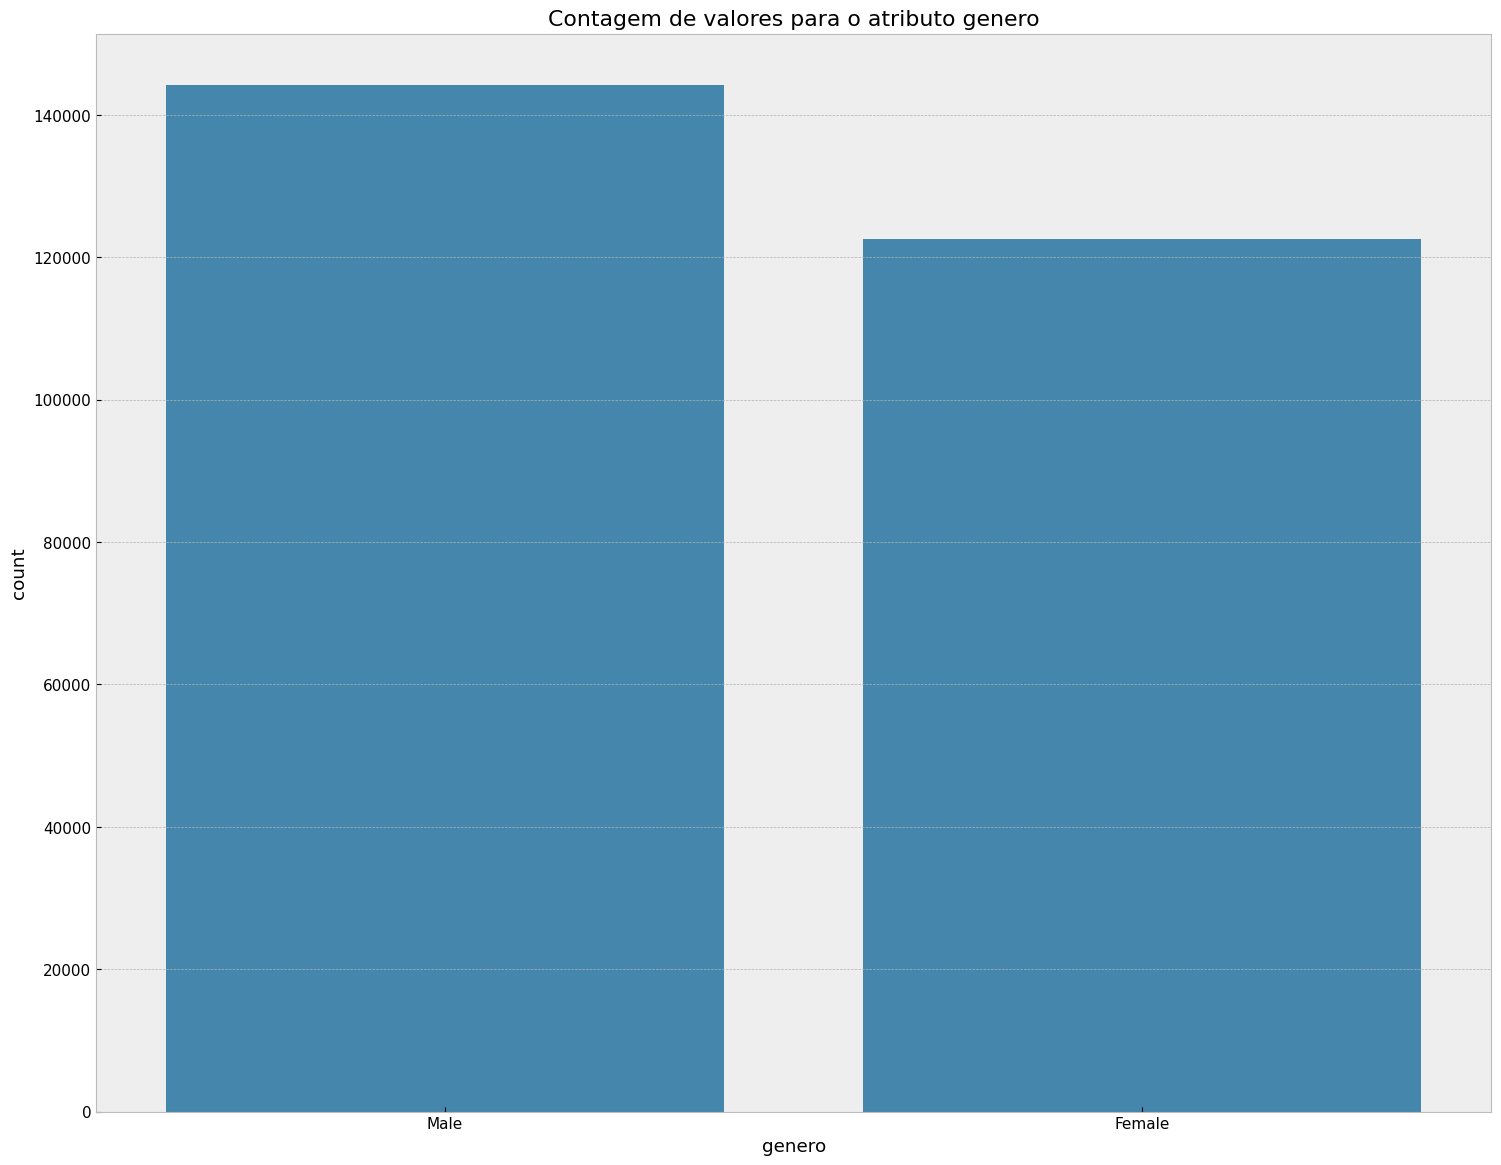

----------------------------------------------------------------

Atributo: idade_veiculo
Total de Valores Únicos: 3
Total de Valores não Nulos: 266776
Total de Valores Nulos: 0
Porcentagem Valores Nulos (%) : 0.00%

Valores Descritos: ['1-2 Year', '< 1 Year', '> 2 Years']

Contagem de 1-2 Year: 140360; Porcentagem em relação ao total:52.61%
Contagem de < 1 Year: 115120; Porcentagem em relação ao total:43.15%
Contagem de > 2 Years: 11296; Porcentagem em relação ao total:4.23%


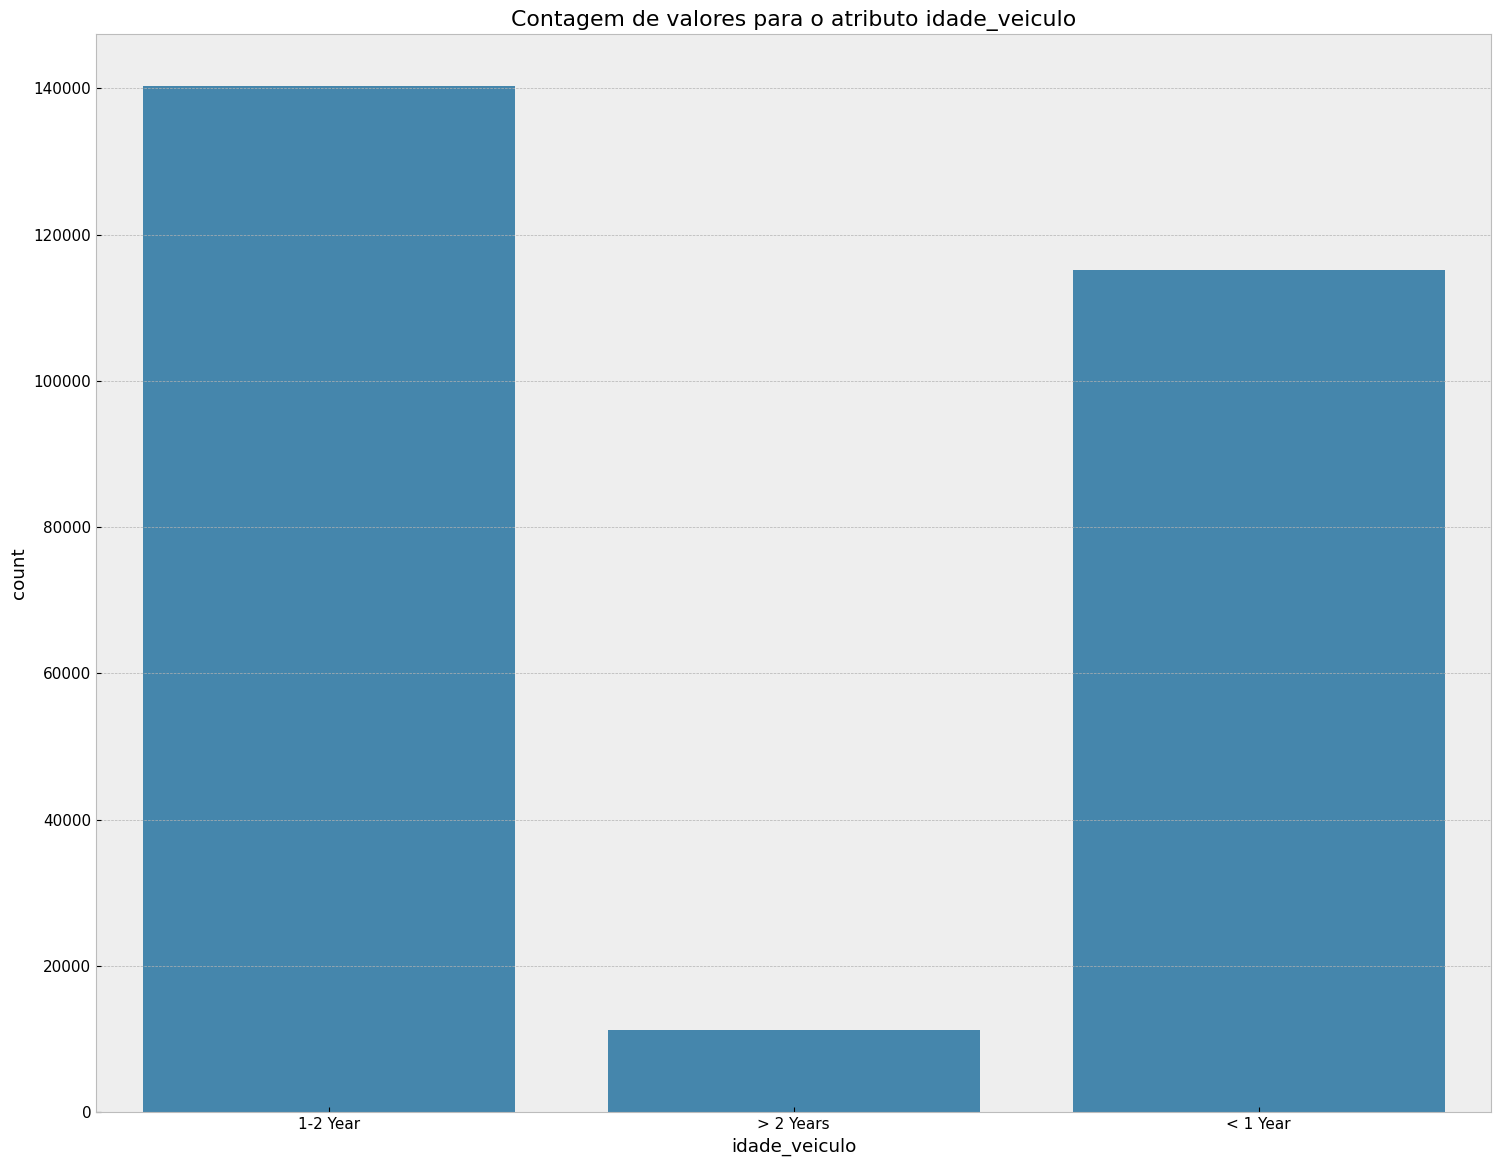

----------------------------------------------------------------

Atributo: veiculo_danificado
Total de Valores Únicos: 2
Total de Valores não Nulos: 266776
Total de Valores Nulos: 0
Porcentagem Valores Nulos (%) : 0.00%

Valores Descritos: ['No', 'Yes']

Contagem de No: 131974; Porcentagem em relação ao total:49.47%
Contagem de Yes: 134802; Porcentagem em relação ao total:50.53%


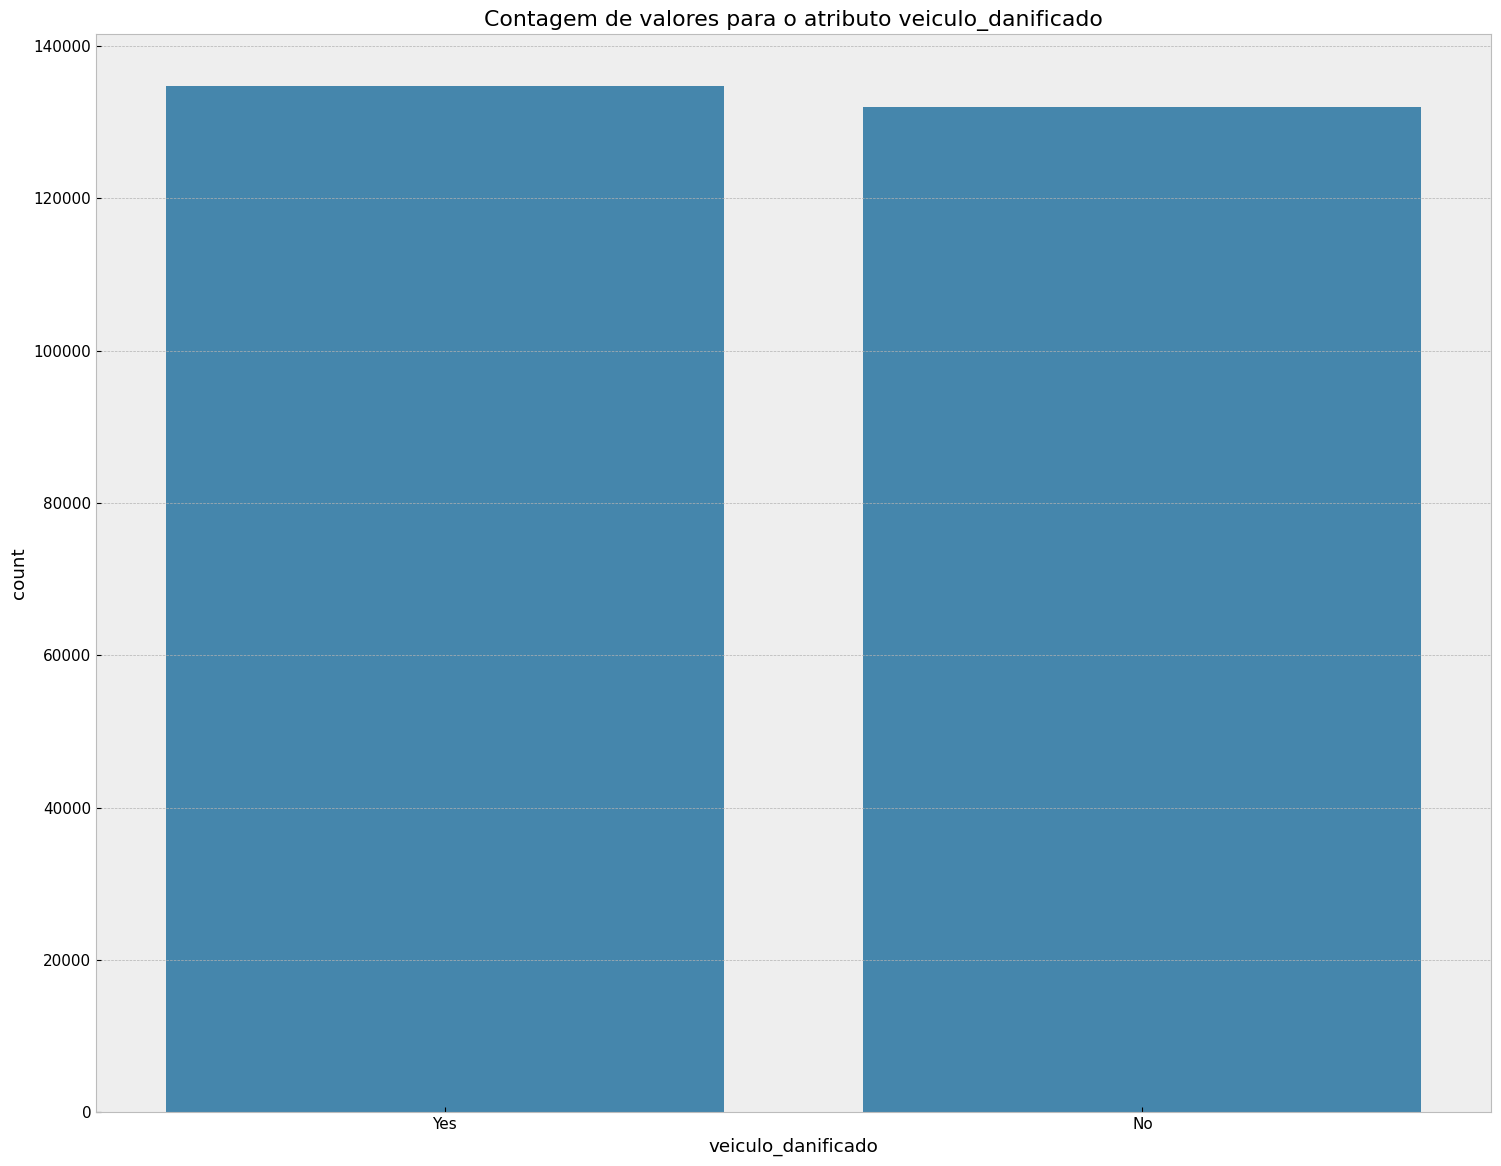

----------------------------------------------------------------



In [14]:
fs.visualizacao_dados_categoricos(var_cat)